In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
final_data = pd.read_csv('/content/drive/MyDrive/2022_2/Data_Integration/Train_1_10/data_ok.csv')
final_data.head()

,title,price,address,area,date,description,link_image,url_page,direct,floor,name_contact,phone_contact,city,district
0,Căn Hộ 2 PN 55m2 Phan Huy Ích – sát KCN Tân B...,880.0,"Phường 15, Quận Tân Bình, TP Hồ Chí Minh",55.0m2,NaN,NaN,['https://img.homedy.com/store/images/2023/06/...,https://homedy.com/ban-can-ho-quan-tan-binh-tp...,NaN,NaN,Quý,0901.321.245,Hồ Chí Minh,Quận Tân Bình
1,Căn Hộ Q Tân Bình 860tr/sổ riêng-Trọn đời. Tặ...,860.0,"Phường 13, Quận Tân Bình, TP Hồ Chí Minh",60.0m2,NaN,NaN,['https://img.homedy.com/store/images/2023/06/...,https://homedy.com/ban-can-ho-quan-tan-binh-tp...,NaN,NaN,Trần Mai Phương,0931.601.365,Hồ Chí Minh,Quận Tân Bình
2,Căn Hộ 1PN Full Nội Thất 38m2 CẠNH SÔNG SÀI G...,11.5,"Phường Bình An, Quận 2, TP Hồ Chí Minh",38.0m2,NaN,NaN,['https://img.homedy.com/store/images/2023/06/...,https://homedy.com/ban-can-ho-quan-2-tp-ho-chi...,NaN,NaN,Nguyễn Thị Tuyết Hương,0906.022.702,Hồ Chí Minh,Quận 2
3,Bán căn hộ Vũng Tàu Center Thành phố Vũng Tàu...,2650.0,"Phường Thắng Nhì, Thành phố Vũng Tàu, Bà Rịa ...",76.0m2,NaN,- Ngân Hàng tài trợ 70%,['https://img.homedy.com/store/images/2023/03/...,https://homedy.com/ban-can-ho-thanh-pho-vung-t...,NaN,NaN,Son,0937.002.378,Bà Rịa - Vũng Tàu,Thành phố Vũng Tàu
4,Bán căn hộ Thành phố Đà Lạt - Lâm Đồng giá 2....,2900.0,"Phường 10, Thành phố Đà Lạt, Lâm Đồng",56.0m2,NaN,NaN,['https://img.homedy.com/store/images/2023/06/...,https://homedy.com/ban-can-ho-thanh-pho-da-lat...,NaN,NaN,Liêm ngô,0937.500.334,Lâm Đồng,Thành phố Đà Lạt


In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61865 entries, 0 to 61864
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          61863 non-null  object 
 1   price          61865 non-null  float64
 2   address        61865 non-null  object 
 3   area           59679 non-null  object 
 4   date           57342 non-null  object 
 5   description    58187 non-null  object 
 6   link_image     61865 non-null  object 
 7   url_page       61865 non-null  object 
 8   direct         3845 non-null   object 
 9   floor          5942 non-null   float64
 10  name_contact   27600 non-null  object 
 11  phone_contact  61863 non-null  object 
 12  city           61865 non-null  object 
 13  district       59654 non-null  object 
dtypes: float64(2), object(12)
memory usage: 6.6+ MB


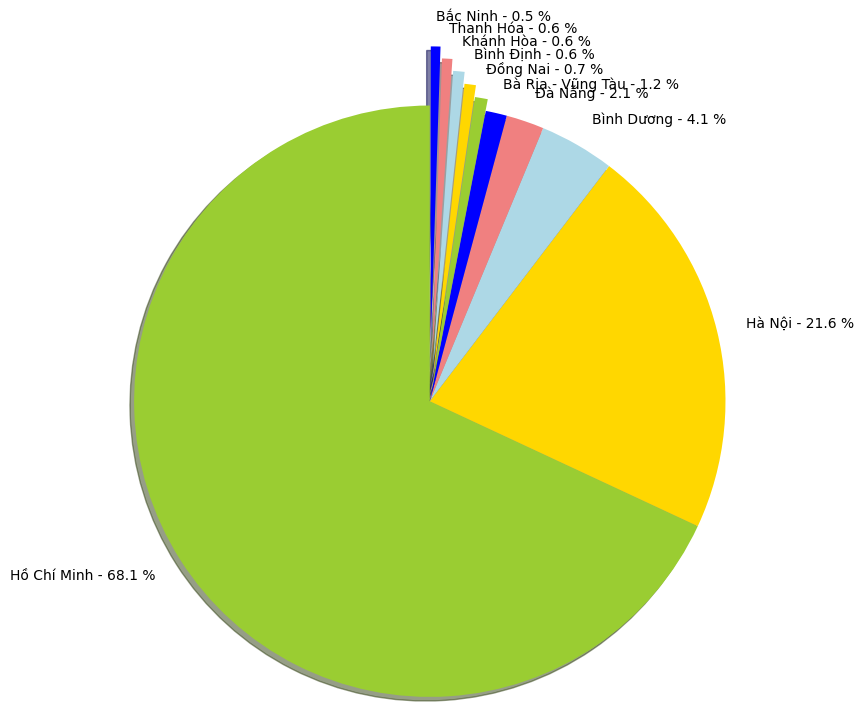

In [15]:
labels = final_data["city"].value_counts().index[:10]
sizes = final_data["city"].value_counts().values[:10]
explode=[0,0,0,0,0,0.08,0.16,0.24,0.32,0.4]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90, radius=2, labels=labels)

plt.show()

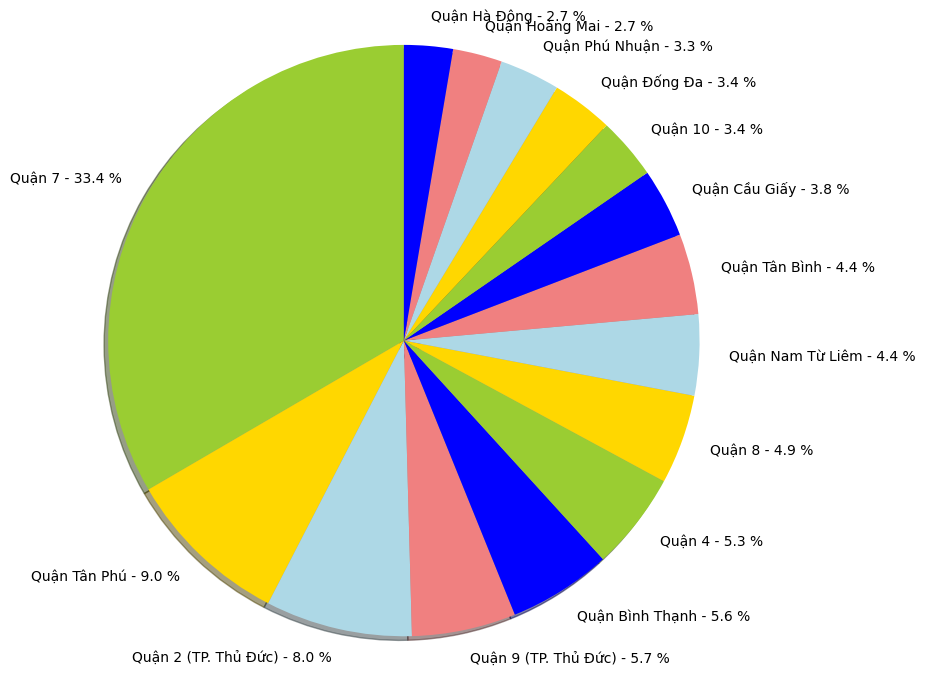

In [18]:
labels = final_data["district"].value_counts().index[:15]
sizes = final_data["district"].value_counts().values[:15]
explode=[0]*15
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90, radius=2, labels=labels)

plt.show()

In [24]:
def convert_direct(direct):
    dict_direct = {'dong bac': 'Đông Bắc', 'tay bac': 'Tây Bắc', 'dong': 'Đông', 'nam': 'Nam',
               'bac' : 'Bắc', 'dong nam': 'Đông Nam', 'tay nam': 'Tây Nam', 'tay': 'Tây'}
    if(direct in dict_direct):
        return dict_direct[direct]
    else:
        return direct
final_data['direct'] = final_data['direct'].apply(convert_direct)

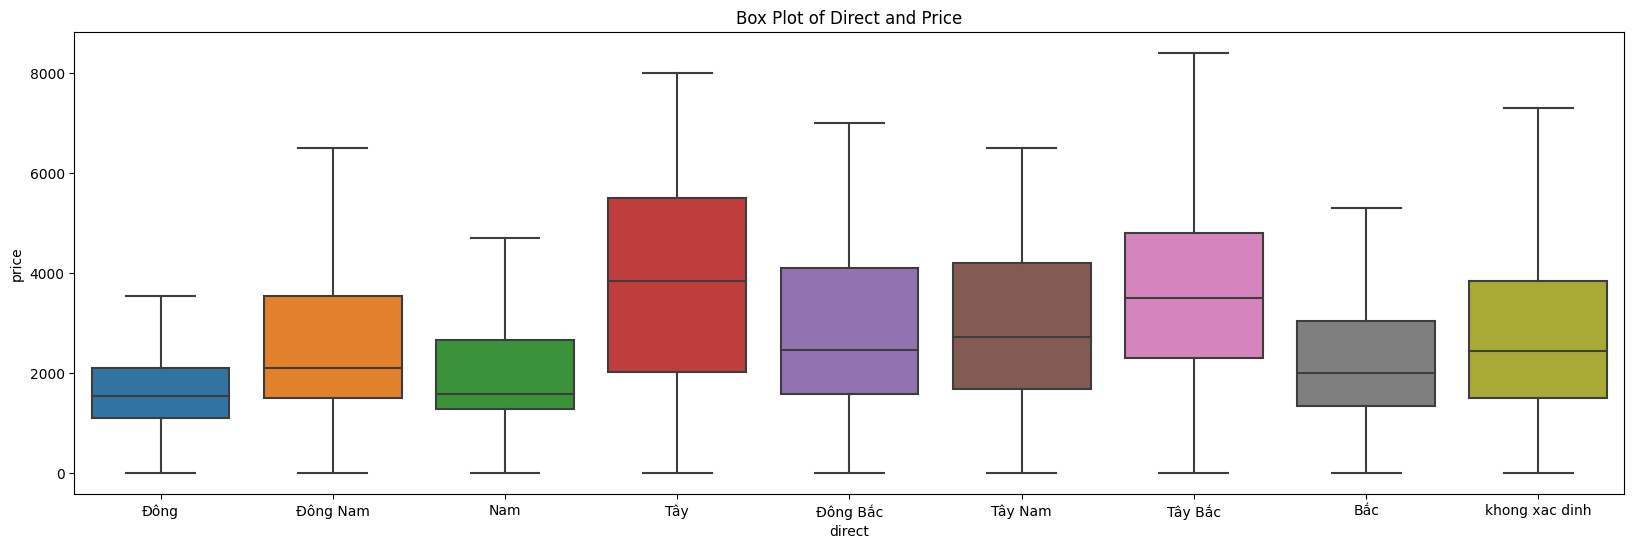

In [25]:
direct_price = pd.concat([final_data['direct'], final_data['price']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Direct and Price')
fig = sns.boxplot(x='direct', y='price', data=direct_price, showfliers=False)

In [27]:
big_city = final_data["city"].value_counts().index[:10]
print(big_city)

Index(['Hồ Chí Minh', 'Hà Nội', 'Bình Dương', 'Đà Nẵng', 'Bà Rịa - Vũng Tàu',
       'Đồng Nai', 'Bình Định', 'Khánh Hòa', 'Thanh Hóa', 'Bắc Ninh'],
      dtype='object')


In [32]:
# Lọc dữ liệu của 10 thành phố lớn
big_city = final_data["city"].value_counts().index[:15]

# Tạo DataFrame mới chỉ chứa dữ liệu của 10 thành phố lớn
filtered_data = final_data[final_data["city"].isin(big_city)]

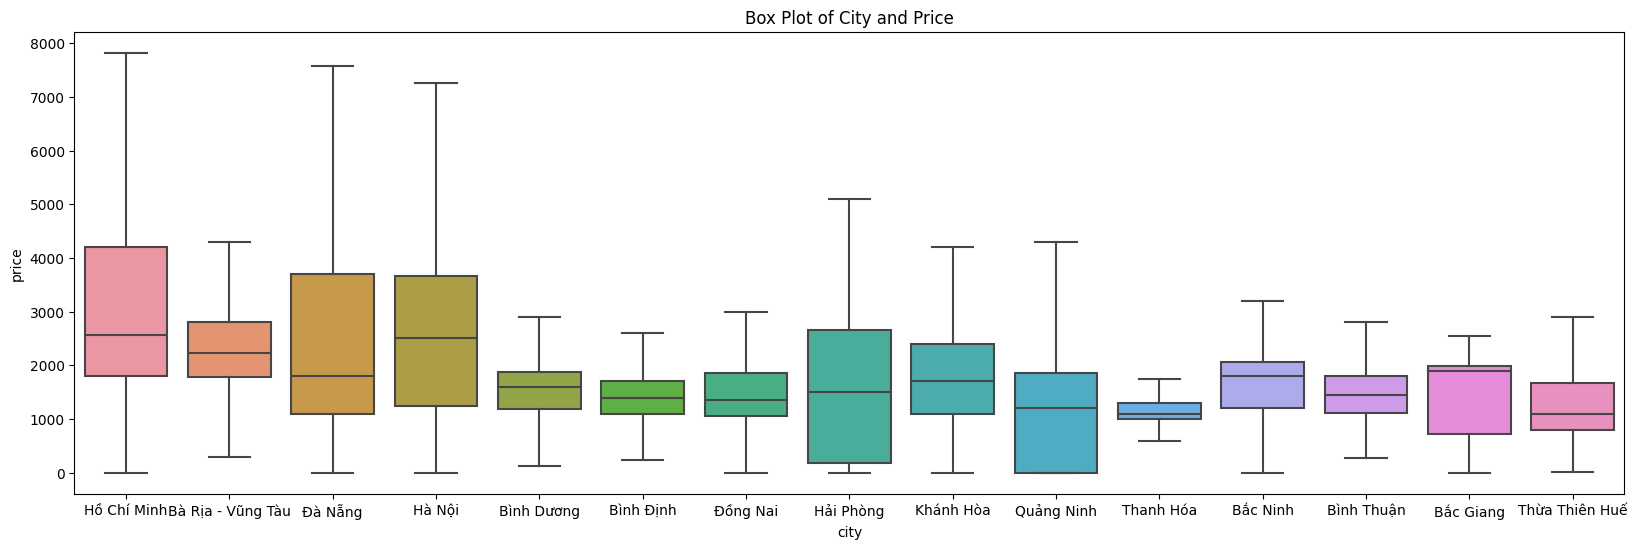

In [33]:
direct_price = pd.concat([filtered_data['city'], filtered_data['price']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of City and Price')
fig = sns.boxplot(x='city', y='price', data=direct_price, showfliers=False)